# Descriptive Statistic & Visualization

## Descriptive Statistic

In [1]:
# Make Jupyter reload library before every execution

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd


df= pd.read_csv('data/all.csv', parse_dates=True, )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Timestamp                        108 non-null    object 
 1   Age Group                        108 non-null    object 
 2   Gender                           108 non-null    object 
 3   Education Level                  108 non-null    object 
 4   Occupation                       108 non-null    object 
 5   Exercise Days/Week               108 non-null    object 
 6   Device Usage (hrs/day)           107 non-null    object 
 7   Screen Time Before Sleep         108 non-null    object 
 8   Height (cm)                      83 non-null     float64
 9   Weight (kg)                      92 non-null     float64
 10  Bedtime                          108 non-null    object 
 11  Wake-up Time                     108 non-null    object 
 12  Sleep Onset Time      

In [3]:
df.drop(labels=["Timestamp"], inplace=True, axis=1)
df.sample(5)

,Age Group,Gender,Education Level,Occupation,Exercise Days/Week,Device Usage (hrs/day),Screen Time Before Sleep,Height (cm),Weight (kg),Bedtime,Wake-up Time,Sleep Onset Time,Nap Duration,Sleep Duration (hrs/24hr),Sleep Quality,Sleep Disturbances,Sleep Medication,Language,BMI,Calculated Night Sleep Duration
3,25-34,Male,Master's,Student,1-2 Days,1-3 Hours,30-60 Minutes,173.0,88.0,00:30,06:00,15-30 Minutes,60-90 mins,6+ Hours,4,Rarely,No,English,29.4,5.5
71,25-34,Female,Doctorate/Prof.,Professional/Office Worker,5+ Days,7+ Hours,30-60 Minutes,154.0,59.2,22:50,06:20,15-30 Minutes,No Nap,6+ Hours,3,Rarely,No,Bengali,25.0,7.5
91,16-24,Female,High School,Student,1-2 Days,7+ Hours,1-2 Hours,167.0,60.0,01:00,08:30,<15 Minutes,No Nap,6+ Hours,4,Sometimes,No,Korean,21.5,7.5
75,25-34,Male,Master's,Other,3-4 Days,4-6 Hours,<30 Minutes,NaN,NaN,23:00,07:00,<15 Minutes,"Yes, <30 mins",6+ Hours,4,Sometimes,No,Bengali,NaN,8.0
28,35-44,Male,Doctorate,Professional/Office Worker,3-4 Days,1-3 Hours,30-60 Minutes,170.0,75.0,00:00,08:00,15-30 Minutes,No Nap,6+ Hours,4,Sometimes,No,English,26.0,8.0


In [4]:
# Calculating descriptive statistics for the dataset
descriptive_stats = df.describe()

# Since describe() includes only numeric data by default, adding additional descriptive statistics for non-numeric data
non_numeric_stats = df.describe(include=[object])


- **Sleep Quality:** On average, respondents rated their sleep quality around 3 on a scale, indicating moderate sleep quality.
- **BMI:** The average Body Mass Index (BMI) is around 23.55, with a range extending from 16.5 to 39.4.
- **Calculated Night Sleep Duration:** The average night sleep duration is around 7 hours, with a wide range from 1.67 hours to almost 9.75 hours.

In [5]:
descriptive_stats

,Height (cm),Weight (kg),Sleep Quality,BMI,Calculated Night Sleep Duration
count,83.000000,92.000000,108.000000,80.000000,105.000000
mean,165.305542,67.415217,3.444444,24.552500,7.036952
std,8.321679,12.798085,0.824092,4.245503,1.368431
min,150.000000,43.000000,2.000000,17.500000,1.670000
25%,160.000000,59.800000,3.000000,21.500000,6.500000
50%,167.000000,68.000000,3.000000,23.550000,7.000000
75%,171.000000,75.000000,4.000000,26.600000,8.000000
max,185.000000,100.000000,5.000000,39.400000,9.750000


- **Age Group:** The most common age group among respondents is 25-34.
- **Gender:** A slightly higher number of male respondents compared to females.
- **Education Level:** The majority of respondents have a Master's degree.
- **Occupation:** Many respondents are students.
- **Exercise Days/Week:** '1-2 Days' is the most common response for exercise frequency.
- **Device Usage (hrs/day):** A large portion of respondents use devices for '7+ Hours' per day.
- **Screen Time Before Sleep:** '30-60 Minutes' is the most common duration for screen time before sleep.
- **Sleep Disturbances:** 'Rarely' is the most frequent response, indicating that most respondents rarely experience sleep disturbances.
- **Sleep Medication:** The majority of respondents do not use sleep medication.
- **Language:** English is the most common language among respondents.

In [6]:
non_numeric_stats

,Age Group,Gender,Education Level,Occupation,Exercise Days/Week,Device Usage (hrs/day),Screen Time Before Sleep,Bedtime,Wake-up Time,Sleep Onset Time,Nap Duration,Sleep Duration (hrs/24hr),Sleep Disturbances,Sleep Medication,Language
count,108,108,108,108,108,107,108,108,108,108,108,107,108,108,108
unique,5,3,5,7,4,3,4,18,20,4,11,3,5,2,4
top,25-34,Male,Master's,Student,1-2 Days,7+ Hours,30-60 Minutes,23:00,07:00,15-30 Minutes,No Nap,6+ Hours,Rarely,No,English
freq,72,67,47,47,43,43,45,24,18,55,61,64,48,105,68


## Visualization

### Demographics

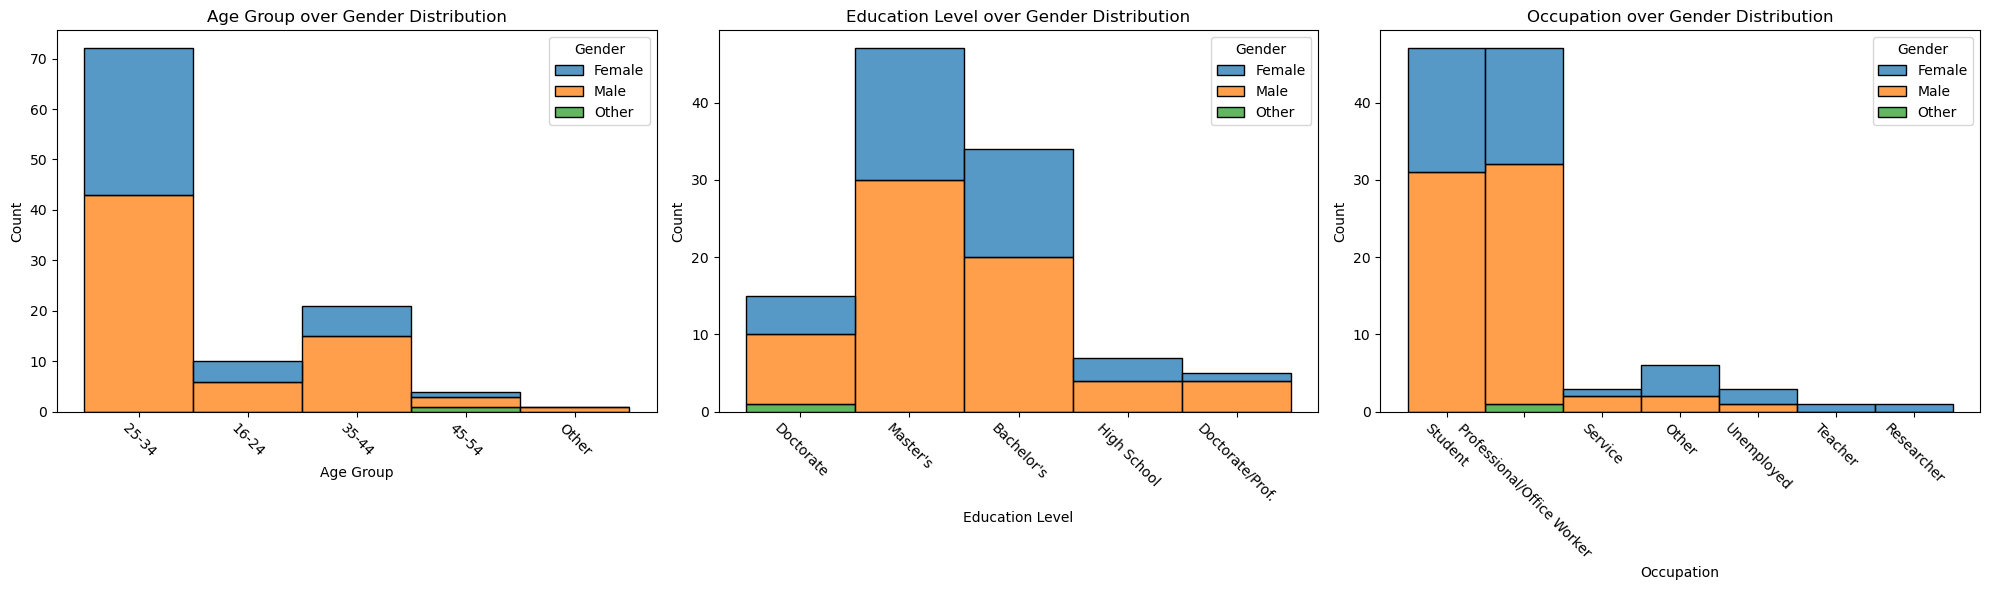

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ["Age Group", "Education Level", "Occupation"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col_name in enumerate(columns):
    sns.histplot(data=df, x=col_name, hue="Gender", multiple="stack", ax=axes[i])
    axes[i].set_title(f"{col_name} over Gender Distribution")
    axes[i].tick_params(axis='x', rotation=-45)
    

plt.tight_layout()
plt.show()

### Lifestyle

In [30]:
df.columns

Index(['Age Group', 'Gender', 'Education Level', 'Occupation',
       'Exercise Days/Week', 'Device Usage (hrs/day)',
       'Screen Time Before Sleep', 'Height (cm)', 'Weight (kg)', 'Bedtime',
       'Wake-up Time', 'Sleep Onset Time', 'Nap Duration',
       'Sleep Duration (hrs/24hr)', 'Sleep Quality', 'Sleep Disturbances',
       'Sleep Medication', 'Language', 'BMI',
       'Calculated Night Sleep Duration'],
      dtype='object')

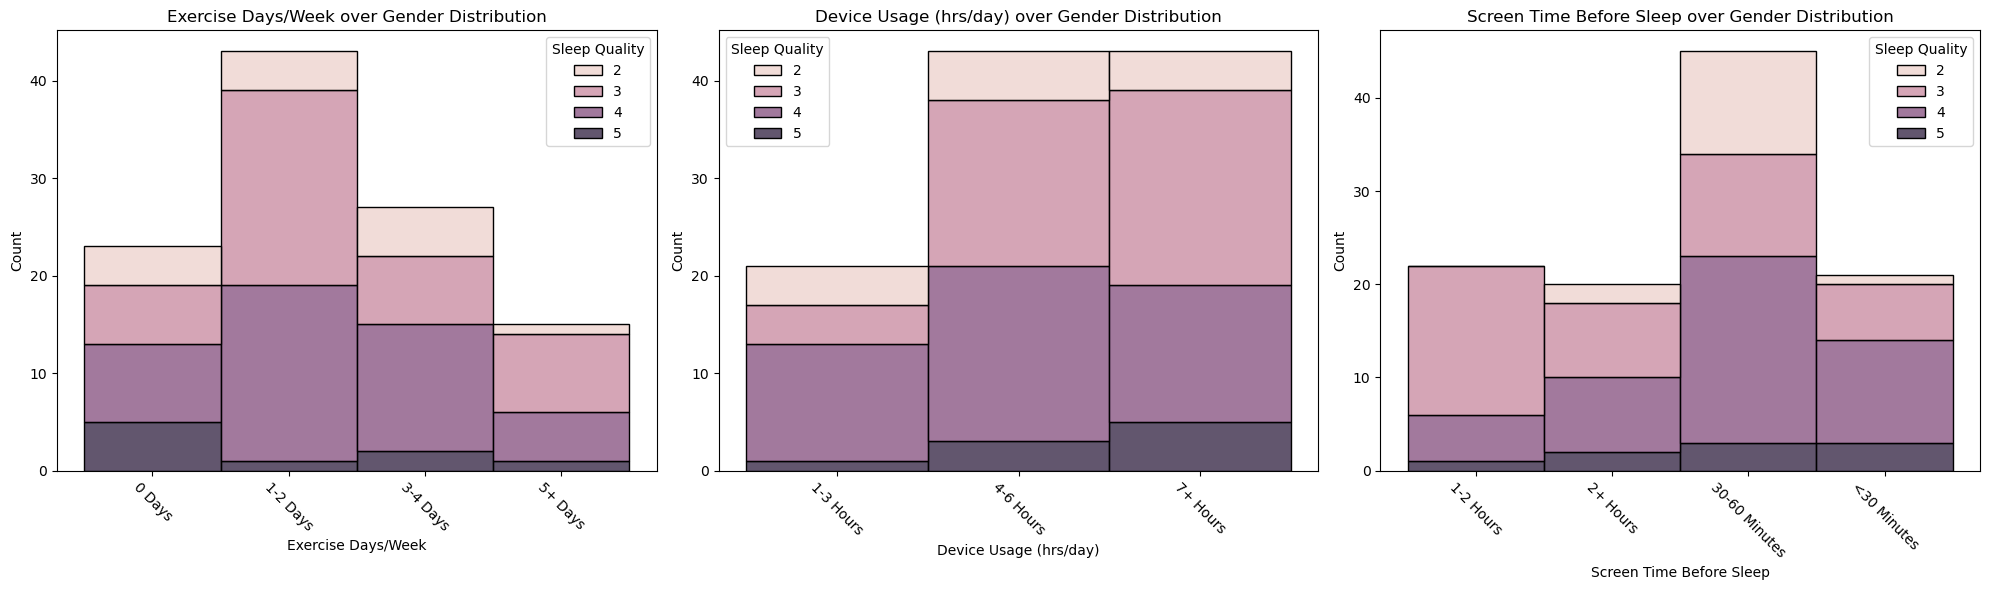

In [33]:
columns = ['Exercise Days/Week', 'Device Usage (hrs/day)',
       'Screen Time Before Sleep']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col_name in enumerate(columns):
    df.sort_values(by=col_name, inplace=True)
    sns.histplot(data=df, x=col_name, hue="Sleep Quality", multiple="stack", ax=axes[i])
    axes[i].set_title(f"{col_name} over Gender Distribution")
    axes[i].tick_params(axis='x', rotation=-45)
    

plt.tight_layout()
plt.show()